## Introduction
主要用于测试二维MT有限差分正演的python程序 MT2D.py

预测测试三种模型：
- 半空间模型
- 层状模型
- 异常体模型


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from MT2D import *

### 1. 半空间模型

In [ ]:
def generate_model(nza, y, z, size_b, size_k, n_freq, alpha = 3.0, mode='random', set_1=100.0, set_2=100.0):
    '''
    nza   : number of air layer
    y     : [-y,y]
    z     : [0,z]: 
    size_b: number of nodes from boundary to kernel domain
    size_k: kernel domain,
    n_freq: number of frequency
    alpha : smoothness of gaussian random field,the larger the more smooth;
    mode  : if random, 下面是mean和std，if bounda, 是lower和upper
    '''
    z_air = np.linspace(-z,0,nza+1)
    zn0 = np.linspace(0, z, size_k+1)
    z_b = np.linspace(zn0[-1],2*zn0[-1],size_b+1)
    zn  = np.concatenate((z_air[:-1],zn0,z_b[1:]))
    # zn  = zn.reshape((len(zn),1))

    yn0 = np.linspace(-y,y,size_k+1)
    y_l = np.linspace(2*yn0[0],yn0[0],size_b+1)
    y_r = np.linspace(yn0[-1],2*yn0[-1],size_b+1)
    yn  = np.concatenate((y_l[:-1],yn0,y_r[1:]))
    # yn  = yn.reshape((len(yn),1)) - np.min(yn)
#     y0 = yn-y_l[0]
    
    freq = np.logspace(1,-3,n_freq)
    # freq = freq.reshape((len(freq),1))
    ry = np.linspace(-y,y,size_k+1)
    # ry = ry.reshape((len(ry),1))-np.min(ry)

    sig = np.ones((size_b+size_k+nza,2*size_b+size_k))*1e-2
    sig[:nza,:] = 1e-9
#     model0 = gr.gaussian_random_field(alpha = alpha, size = size_k, 
#                                    mode=mode, set_1=set_1, set_2=set_2)
#     model[int(size_b/2)+1:int(size_b/2)+size_k+1, :size_k] = model0
    return zn, yn, freq, ry, sig

In [2]:
alpha = 3.0 # smoothness of gaussian random field,the larger the more smooth;
nza = 10 # number of air layer
y = 10e3    # lenght in left and right 
z = 20e3    # depth
size_b = 10 # nodes of expand domain
size_k = 20 # nodes of kernel domain
n_freq = 5  # number of frequency
filename = 'MT_random.mat' # filename saved for apparent resistancy and phase. 
alpha = 3.0
mode = 'random' # if random, 下面是mean和std，if bounda, 是lower和upper
set_1 = 100.0
set_2 = 100.0

In [3]:
zn, yn, freq, ry, sig = generate_model(nza, y, z, size_b, size_k, n_freq, alpha, mode, set_1, set_2)
model = MT2DFD(nza, zn, yn, freq, ry, sig)

rhoxy, phsxy,Zxy,rhoyx,phsyx,Zyx  = model.mt2d("TETM")

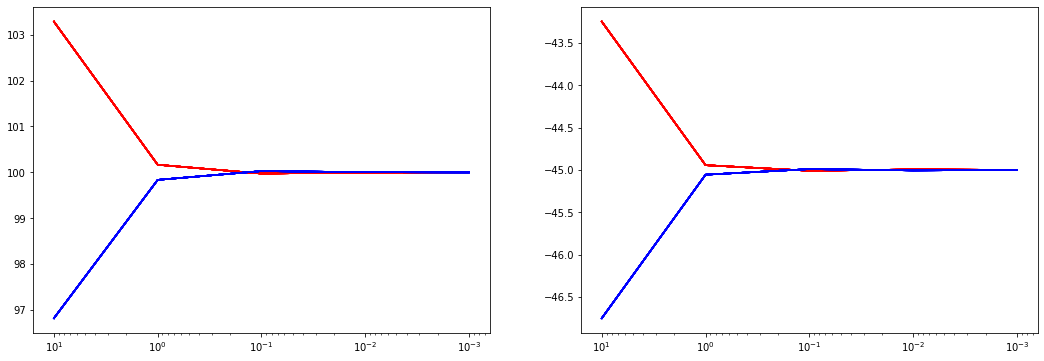

In [8]:
fig = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax.plot(freq, rhoxy[:,0], 'r')
ax.plot(freq, rhoyx[:,0], 'b')
ax.set_xscale("log")
ax.invert_xaxis()

ax = plt.subplot(1,2,2)
ax.plot(freq, phsxy[:,0], 'r')
ax.plot(freq, phsyx[:,0]-180, 'b')
ax.set_xscale("log")
ax.invert_xaxis()
plt.show()

### 2. 层状模型

In [12]:
def generate_model(nza, y, z, size_b, size_k, n_freq, alpha = 3.0, mode='random', set_1=100.0, set_2=100.0):
    '''
    nza   : number of air layer
    y     : [-y,y]
    z     : [0,z]: 
    size_b: number of nodes from boundary to kernel domain
    size_k: kernel domain,
    n_freq: number of frequency
    alpha : smoothness of gaussian random field,the larger the more smooth;
    mode  : if random, 下面是mean和std，if bounda, 是lower和upper
    '''
    z_air = np.linspace(-z,0,nza+1)
    zn0 = np.linspace(0, z, size_k+1)
    z_b = np.linspace(zn0[-1],2*zn0[-1],size_b+1)
    zn  = np.concatenate((z_air[:-1],zn0,z_b[1:]))
    # zn  = zn.reshape((len(zn),1))

    yn0 = np.linspace(-y,y,size_k+1)
    y_l = np.linspace(2*yn0[0],yn0[0],size_b+1)
    y_r = np.linspace(yn0[-1],2*yn0[-1],size_b+1)
    yn  = np.concatenate((y_l[:-1],yn0,y_r[1:]))
    # yn  = yn.reshape((len(yn),1)) - np.min(yn)
#     y0 = yn-y_l[0]
    
    freq = np.logspace(1,-3,n_freq)
    # freq = freq.reshape((len(freq),1))
    ry = np.linspace(-y,y,size_k+1)
    # ry = ry.reshape((len(ry),1))-np.min(ry)

    sig = np.ones((size_b+size_k+nza,2*size_b+size_k))*1e-2
    sig[:nza,:] = 1e-9
    sig[nza+5:nza+10,:] = 0.1
#     model0 = gr.gaussian_random_field(alpha = alpha, size = size_k, 
#                                    mode=mode, set_1=set_1, set_2=set_2)
#     model[int(size_b/2)+1:int(size_b/2)+size_k+1, :size_k] = model0
    return zn, yn, freq, ry, sig

In [13]:
zn, yn, freq, ry, sig = generate_model(nza, y, z, size_b, size_k, n_freq, alpha, mode, set_1, set_2)
model = MT2DFD(nza, zn, yn, freq, ry, sig)

rhoxy, phsxy,Zxy,rhoyx,phsyx,Zyx  = model.mt2d("TETM")

In [21]:
rhoxy[:,0]

array([102.87253416, 110.43636726,  37.0376963 ,  28.58623345,
        58.75470348])

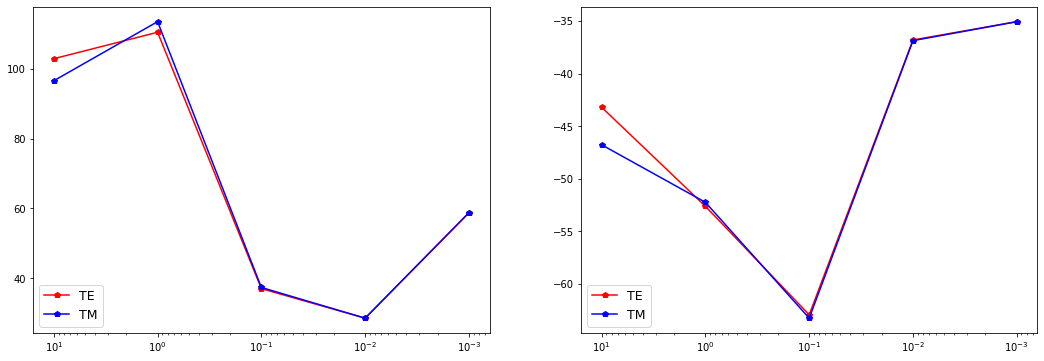

In [22]:
fig = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax.plot(freq, rhoxy[:,0], 'rp-',label="TE")
ax.plot(freq, rhoyx[:,0], 'bp-',label="TM")
ax.set_xscale("log")
ax.invert_xaxis()
ax.legend(loc='lower left',fontsize=12.5)
ax = plt.subplot(1,2,2)
ax.plot(freq, phsxy[:,0], 'rp-',label="TE")
ax.plot(freq, phsyx[:,0]-180, 'bp-',label="TM")
ax.set_xscale("log")
ax.invert_xaxis()
ax.legend(loc='lower left',fontsize=12.5)
plt.show()

### 3. 异常体模型

In [25]:
def generate_model(nza, y, z, size_b, size_k, n_freq, alpha = 3.0, mode='random', set_1=100.0, set_2=100.0):
    '''
    nza   : number of air layer
    y     : [-y,y]
    z     : [0,z]: 
    size_b: number of nodes from boundary to kernel domain
    size_k: kernel domain,
    n_freq: number of frequency
    alpha : smoothness of gaussian random field,the larger the more smooth;
    mode  : if random, 下面是mean和std，if bounda, 是lower和upper
    '''
    z_air = np.linspace(-z,0,nza+1)
    zn0 = np.linspace(0, z, size_k+1)
    z_b = np.linspace(zn0[-1],2*zn0[-1],size_b+1)
    zn  = np.concatenate((z_air[:-1],zn0,z_b[1:]))
    # zn  = zn.reshape((len(zn),1))

    yn0 = np.linspace(-y,y,size_k+1)
    y_l = np.linspace(2*yn0[0],yn0[0],size_b+1)
    y_r = np.linspace(yn0[-1],2*yn0[-1],size_b+1)
    yn  = np.concatenate((y_l[:-1],yn0,y_r[1:]))
    # yn  = yn.reshape((len(yn),1)) - np.min(yn)
#     y0 = yn-y_l[0]
    
    freq = np.logspace(1,-3,n_freq)
    # freq = freq.reshape((len(freq),1))
    ry = np.linspace(-y,y,size_k+1)
    # ry = ry.reshape((len(ry),1))-np.min(ry)

    sig = np.ones((size_b+size_k+nza,2*size_b+size_k))*1e-2
    sig[:nza,:] = 1e-9
    sig[nza+5:nza+10,size_b+2:size_b+6]= 1e-1
    sig[nza+5:nza+10,size_b+10:size_b+14]= 1e-3
#     model0 = gr.gaussian_random_field(alpha = alpha, size = size_k, 
#                                    mode=mode, set_1=set_1, set_2=set_2)
#     model[int(size_b/2)+1:int(size_b/2)+size_k+1, :size_k] = model0
    return zn, yn, freq, ry, sig

In [38]:
ry

array([-10000.,  -9000.,  -8000.,  -7000.,  -6000.,  -5000.,  -4000.,
        -3000.,  -2000.,  -1000.,      0.,   1000.,   2000.,   3000.,
         4000.,   5000.,   6000.,   7000.,   8000.,   9000.,  10000.])

In [26]:
zn, yn, freq, ry, sig = generate_model(nza, y, z, size_b, size_k, n_freq, alpha, mode, set_1, set_2)
model = MT2DFD(nza, zn, yn, freq, ry, sig)

rhoxy, phsxy,Zxy,rhoyx,phsyx,Zyx  = model.mt2d("TETM")

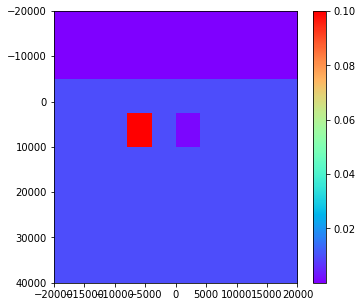

In [43]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(1,2,1)
h = ax.imshow(sig, interpolation='nearest', cmap='rainbow', 
              extent=[yn.min(), yn.max(), zn.min(), zn.max()], 
              origin='lower', aspect='auto')
ax.invert_yaxis()
fig.colorbar(h)
plt.show()

frequency is:0.001



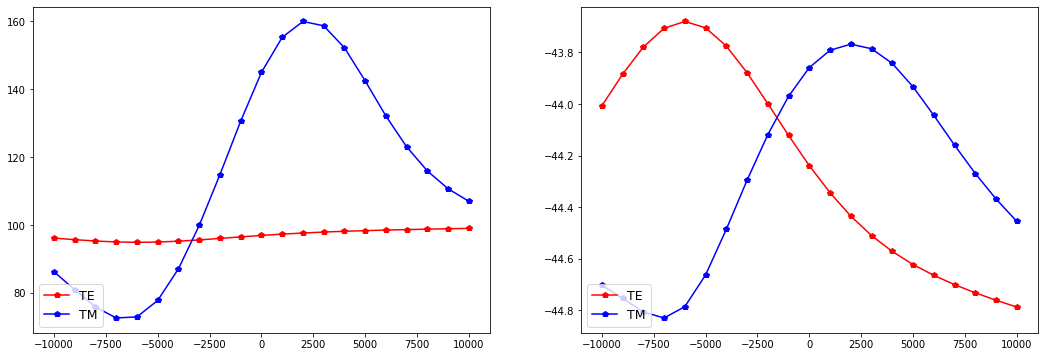

In [40]:
f_id = -1 # idx of frequency
print(f"frequency is:{freq[f_id]}")
print("")
fig = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax.plot(ry, rhoxy[f_id,:], 'rp-',label="TE")
ax.plot(ry, rhoyx[f_id,:], 'bp-',label="TM")
# ax.set_xscale("log")
# ax.invert_xaxis()
ax.legend(loc='lower left',fontsize=12.5)
ax = plt.subplot(1,2,2)
ax.plot(ry, phsxy[f_id,:], 'rp-',label="TE")
ax.plot(ry, phsyx[f_id,:]-180, 'bp-',label="TM")
# ax.set_xscale("log")
# ax.invert_xaxis()
ax.legend(loc='lower left',fontsize=12.5)
plt.show()

In [ ]:

fig = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax.plot(freq, rhoxy[:,0], 'rp-',label="TE")
ax.plot(freq, rhoyx[:,0], 'bp-',label="TM")
ax.set_xscale("log")
ax.invert_xaxis()
ax.legend(loc='lower left',fontsize=12.5)
ax = plt.subplot(1,2,2)
ax.plot(freq, phsxy[:,0], 'rp-',label="TE")
ax.plot(freq, phsyx[:,0]-180, 'bp-',label="TM")
ax.set_xscale("log")
ax.invert_xaxis()
ax.legend(loc='lower left',fontsize=12.5)
plt.show()